In [10]:
import pandas as pd
import numpy as np


In [11]:
df1= pd.read_csv("./layoffs.csv")
df1.head()

,company,location,total_laid_off,date,percentage_laid_off,industry,source,stage,funds_raised,country,date_added
0,Microsoft,Seattle,42.0,9/8/2025,NaN,Other,https://www.bizjournals.com/seattle/news/2025/...,Post-IPO,$1,United States,9/8/2025
1,Rivian,Los Angeles,200.0,9/5/2025,1%,Transportation,https://www.latimes.com/business/story/2025-09...,Post-IPO,$10700,United States,9/8/2025
2,Scope3,New York City,NaN,9/5/2025,NaN,Energy,https://www.adweek.com/media/scope3-lays-off-s...,Series B,$45,United States,9/8/2025
3,Head Digital Works,"Hyderabad,Non-U.S.",500.0,9/4/2025,NaN,Consumer,https://entrackr.com/news/a23-parent-lays-off-...,Private Equity,$74,India,9/8/2025
4,Salesforce,SF Bay Area,262.0,9/4/2025,NaN,Sales,https://www.kron4.com/news/bay-area/salesforce...,Post-IPO,$65,United States,9/8/2025


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4164 entries, 0 to 4163
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              4164 non-null   object 
 1   location             4163 non-null   object 
 2   total_laid_off       2714 non-null   float64
 3   date                 4164 non-null   object 
 4   percentage_laid_off  2636 non-null   object 
 5   industry             4162 non-null   object 
 6   source               4161 non-null   object 
 7   stage                4159 non-null   object 
 8   funds_raised         3699 non-null   object 
 9   country              4162 non-null   object 
 10  date_added           4164 non-null   object 
dtypes: float64(1), object(10)
memory usage: 358.0+ KB


In [13]:
df2=pd.read_csv("./layoffs_data.csv")
df2.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Date,Source,Funds_Raised,Stage,Date_Added,Country,Percentage,List_of_Employees_Laid_Off
0,Oda,Oslo,Food,150.0,2024-06-05,https://techcrunch.com/2024/06/05/softbank-bac...,691.0,Unknown,2024-06-05 18:01:25,Norway,NaN,Unknown
1,Pagaya,Tel Aviv,Finance,100.0,2024-06-05,https://www.calcalistech.com/ctechnews/article...,2000.0,Post-IPO,2024-06-05 23:11:24,Israel,0.20,Unknown
2,Aleph Farms,Tel Aviv,Food,30.0,2024-06-05,https://www.calcalistech.com/ctechnews/article...,119.0,Unknown,2024-06-05 23:13:43,Israel,0.30,Unknown
3,MoonPay,Dover,Crypto,30.0,2024-06-05,https://www.theblock.co/post/298638/moonpay-la...,651.0,Unknown,2024-06-05 23:12:47,United States,0.10,Unknown
4,Yext,New York City,Marketing,NaN,2024-06-05,https://www.investing.com/news/economy-news/ye...,117.0,Post-IPO,2024-06-05 18:02:40,United States,0.12,Unknown


In [14]:
df2.isnull().sum()

Company                          0
Location_HQ                      0
Industry                         0
Laid_Off_Count                1253
Date                             0
Source                           0
Funds_Raised                   390
Stage                            0
Date_Added                       0
Country                          0
Percentage                    1300
List_of_Employees_Laid_Off       0
dtype: int64

Preparation of Data

In [15]:
# 1) Drop extra column(s)
df2 = df2.drop(columns=["List_of_Employees_Laid_Off"], errors="ignore")

# 2) Rename EVERYTHING to match df1
rename_map = {
    "Company": "company",
    "Location_HQ": "location",
    "Laid_Off_Count": "total_laid_off",
    "Date": "date",
    "Percentage": "percentage_laid_off",
    "Industry": "industry",
    "Source": "source",
    "Stage": "stage",
    "Funds_Raised": "funds_raised",
    "Country": "country",
    "Date_Added": "date_added",
}
df2 = df2.rename(columns=rename_map)

# 3) Reorder to df1's column order (and ensure exact alignment)
df2 = df2.reindex(columns=df1.columns)

# (Optional) Sanity check: both column sets should now match
assert list(df2.columns) == list(df1.columns)

# 4) Concatenate
#df = pd.concat([df1, df2], ignore_index=True)


In [16]:
df1["location"].value_counts()

location
SF Bay Area           1038
New York City          419
Boston                 181
Seattle                180
Bengaluru,Non-U.S.     180
                      ... 
Charlottesville          1
Chemnitz,Non-U.S.        1
Alamosa                  1
Førde,Non-U.S.           1
New Orleans              1
Name: count, Length: 265, dtype: int64

In [17]:
df1["location"]=df1["location"].str.replace(",Non-U.S.","",regex=False)
df1["location"]=df1["location"].str.strip()

In [18]:
df1["funds_raised"]=df1["funds_raised"].str.replace("$","",regex=False)
df1["funds_raised"] = df1["funds_raised"].str.strip()

In [19]:
df1["funds_raised"]=df1["funds_raised"].astype("float")

In [20]:

df1["date"] = df1["date"].str.strip()
df1["date"] = pd.to_datetime(df1["date"], format="%m/%d/%Y", errors="coerce")


df2["date"] = df2["date"].str.strip()
df2["date"] = pd.to_datetime(df2["date"], format="%Y-%m-%d", errors="coerce")


In [21]:
df1["percentage_laid_off"]=df1["percentage_laid_off"].str.replace("%","",regex=False)
df1["percentage_laid_off"]=df1["percentage_laid_off"].str.strip()
df1["percentage_laid_off"]=df1["percentage_laid_off"].astype("float")/100


In [22]:
df = pd.concat([df1, df2], ignore_index=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7806 entries, 0 to 7805
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company              7806 non-null   object        
 1   location             7805 non-null   object        
 2   total_laid_off       5103 non-null   float64       
 3   date                 7806 non-null   datetime64[ns]
 4   percentage_laid_off  4978 non-null   float64       
 5   industry             7804 non-null   object        
 6   source               7803 non-null   object        
 7   stage                7801 non-null   object        
 8   funds_raised         6951 non-null   float64       
 9   country              7804 non-null   object        
 10  date_added           7806 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 671.0+ KB


In [24]:
df[(df["company"]=="Google") & (df["total_laid_off"]==1000)]

,company,location,total_laid_off,date,percentage_laid_off,industry,source,stage,funds_raised,country,date_added
828,Google,SF Bay Area,1000.0,2024-01-10,NaN,Consumer,https://www.theverge.com/2024/1/11/24034124/go...,Post-IPO,26.0,United States,1/11/2024
4473,Google,SF Bay Area,1000.0,2024-01-10,NaN,Consumer,https://www.theverge.com/2024/1/11/24034124/go...,Post-IPO,26.0,United States,2024-01-11 14:42:18


In [25]:
df=df.drop(columns=["date_added"])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7806 entries, 0 to 7805
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company              7806 non-null   object        
 1   location             7805 non-null   object        
 2   total_laid_off       5103 non-null   float64       
 3   date                 7806 non-null   datetime64[ns]
 4   percentage_laid_off  4978 non-null   float64       
 5   industry             7804 non-null   object        
 6   source               7803 non-null   object        
 7   stage                7801 non-null   object        
 8   funds_raised         6951 non-null   float64       
 9   country              7804 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 610.0+ KB


In [27]:
df.duplicated().any()


np.True_

In [28]:
df.duplicated().sum()


np.int64(3517)

In [29]:
df = df.drop_duplicates()


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4289 entries, 0 to 7801
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company              4289 non-null   object        
 1   location             4288 non-null   object        
 2   total_laid_off       2791 non-null   float64       
 3   date                 4289 non-null   datetime64[ns]
 4   percentage_laid_off  2720 non-null   float64       
 5   industry             4287 non-null   object        
 6   source               4286 non-null   object        
 7   stage                4284 non-null   object        
 8   funds_raised         3813 non-null   float64       
 9   country              4287 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 368.6+ KB


In [31]:
df= df[df["percentage_laid_off"].notna()]

In [32]:
#df["percentage_laid_off"]=df["percentage_laid_off"].astype("float")

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2720 entries, 1 to 7801
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company              2720 non-null   object        
 1   location             2719 non-null   object        
 2   total_laid_off       1927 non-null   float64       
 3   date                 2720 non-null   datetime64[ns]
 4   percentage_laid_off  2720 non-null   float64       
 5   industry             2718 non-null   object        
 6   source               2720 non-null   object        
 7   stage                2716 non-null   object        
 8   funds_raised         2434 non-null   float64       
 9   country              2719 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 233.8+ KB


In [34]:
df.isnull().sum()

company                  0
location                 1
total_laid_off         793
date                     0
percentage_laid_off      0
industry                 2
source                   0
stage                    4
funds_raised           286
country                  1
dtype: int64

In [35]:
df["funds_raised"].describe()
# lot of outliers in this one 

count      2434.000000
mean        694.912471
std        3992.972745
min           0.000000
25%          53.250000
50%         173.500000
75%         468.000000
max      121900.000000
Name: funds_raised, dtype: float64

In [36]:
df.drop(columns=["total_laid_off"],inplace=True) #leaky feature

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2720 entries, 1 to 7801
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company              2720 non-null   object        
 1   location             2719 non-null   object        
 2   date                 2720 non-null   datetime64[ns]
 3   percentage_laid_off  2720 non-null   float64       
 4   industry             2718 non-null   object        
 5   source               2720 non-null   object        
 6   stage                2716 non-null   object        
 7   funds_raised         2434 non-null   float64       
 8   country              2719 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 212.5+ KB


In [38]:
df.to_csv("layoff_final.csv", index=False)


Exploratory Data Analysis 

In [39]:
print("Number of unique companies:", df["company"].nunique())
print(df["company"].value_counts().head(10))  # top 10 companies with most records


Number of unique companies: 2009
company
Rivian        8
Voi           6
Sonos         6
Salesforce    6
Bounce        5
Cue Health    5
Blend         5
Lyft          5
Peloton       5
Redfin        5
Name: count, dtype: int64


In [40]:
avg_pct=df.groupby("company")["percentage_laid_off"].mean().sort_values(ascending=False).value_counts().head(15)
avg_pct

percentage_laid_off
1.00    280
0.10    144
0.20    119
0.25     94
0.15     93
0.30     83
0.05     67
0.08     56
0.50     46
0.07     46
0.14     42
0.40     41
0.12     39
0.09     37
0.06     35
Name: count, dtype: int64

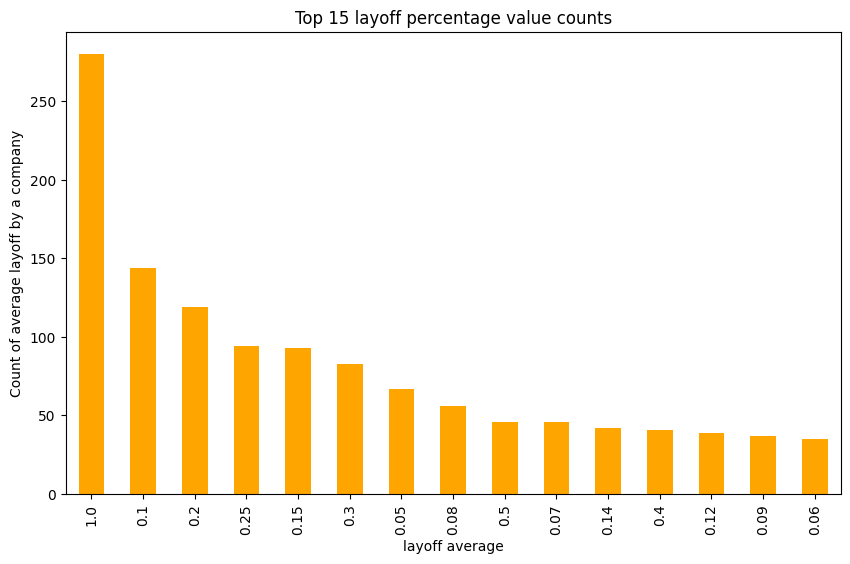

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
avg_pct.plot(kind="bar", color="orange")
plt.title("Top 15 layoff percentage value counts")
plt.ylabel("Count of average layoff by a company")
plt.xlabel("layoff average")
plt.show()


280 companies have laid off 100% of their department in every layoff

In [42]:
import matplotlib.pyplot as plt

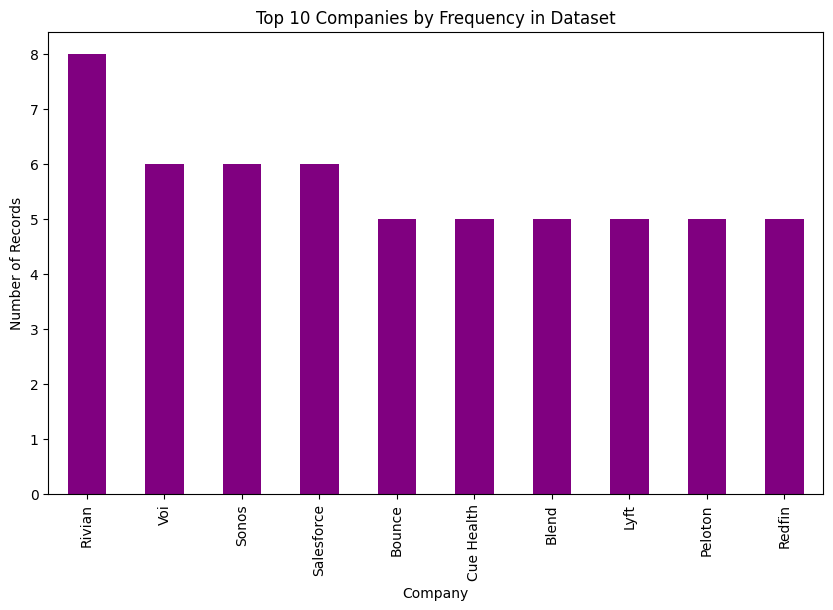

In [43]:
company_freq = df["company"].value_counts().head(10)

plt.figure(figsize=(10,6))
company_freq.plot(kind="bar", color="purple")
plt.title("Top 10 Companies by Frequency in Dataset")
plt.ylabel("Number of Records")
plt.xlabel("Company")
plt.show()


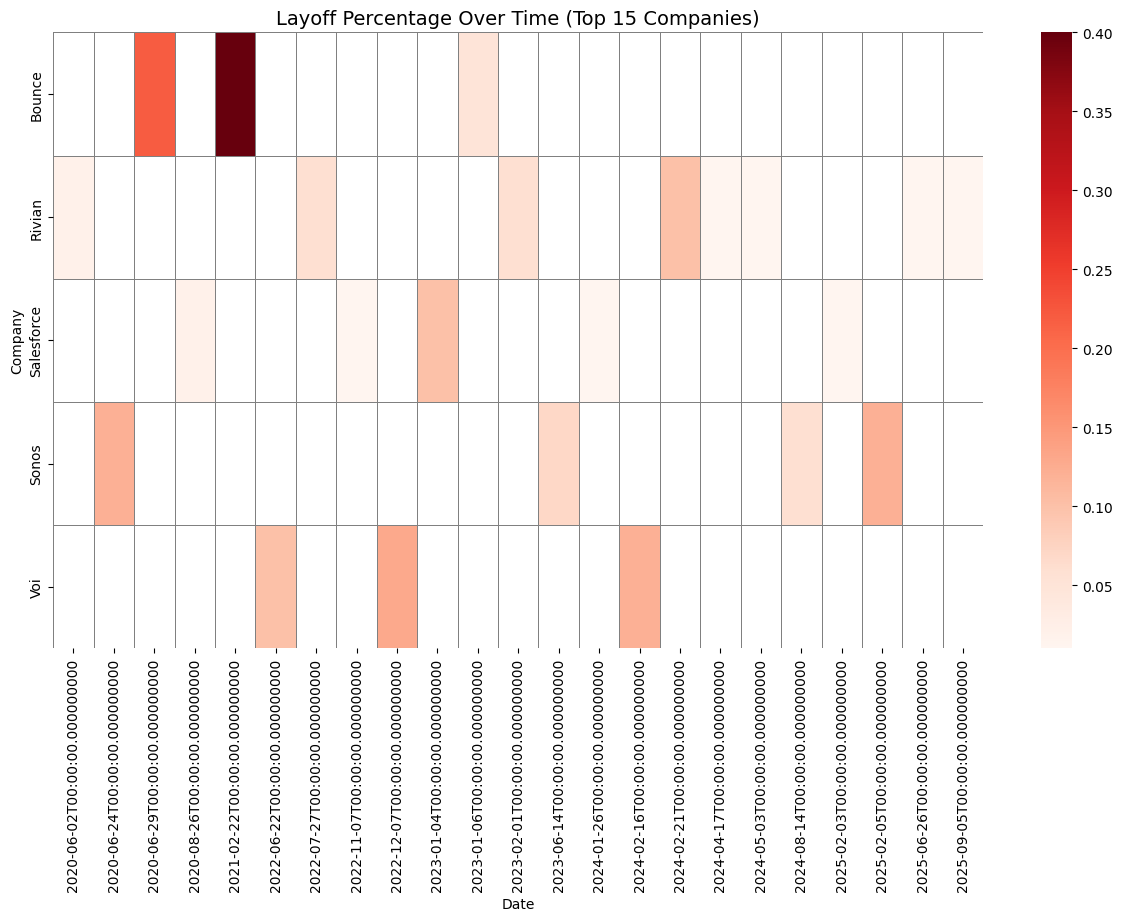

In [44]:
import seaborn as sns


# Top 15 companies with most records (to keep heatmap clean)
top_companies = df["company"].value_counts().head(5).index
df_top = df[df["company"].isin(top_companies)]

# Pivot table: Company × Date
pivot = df_top.pivot_table(
    index="company",
    columns="date",
    values="percentage_laid_off",
    aggfunc="mean"
)

# Plot heatmap
plt.figure(figsize=(15,8))
sns.heatmap(pivot, cmap="Reds", linewidths=0.5, linecolor="gray")
plt.title("Layoff Percentage Over Time (Top 15 Companies)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Company")
plt.show()


In [45]:
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month   # YYYY-MM format


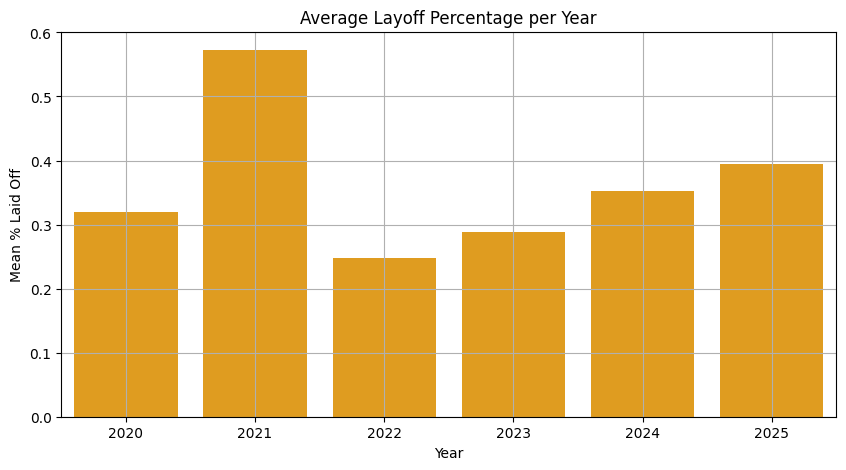

In [46]:
yearly=df.groupby("year")["percentage_laid_off"].mean()
plt.figure(figsize=(10,5))
sns.barplot(x=yearly.index,y=yearly.values,color="orange")
plt.title("Average Layoff Percentage per Year")
plt.ylabel("Mean % Laid Off")
plt.xlabel("Year")
plt.grid(True)
plt.show()

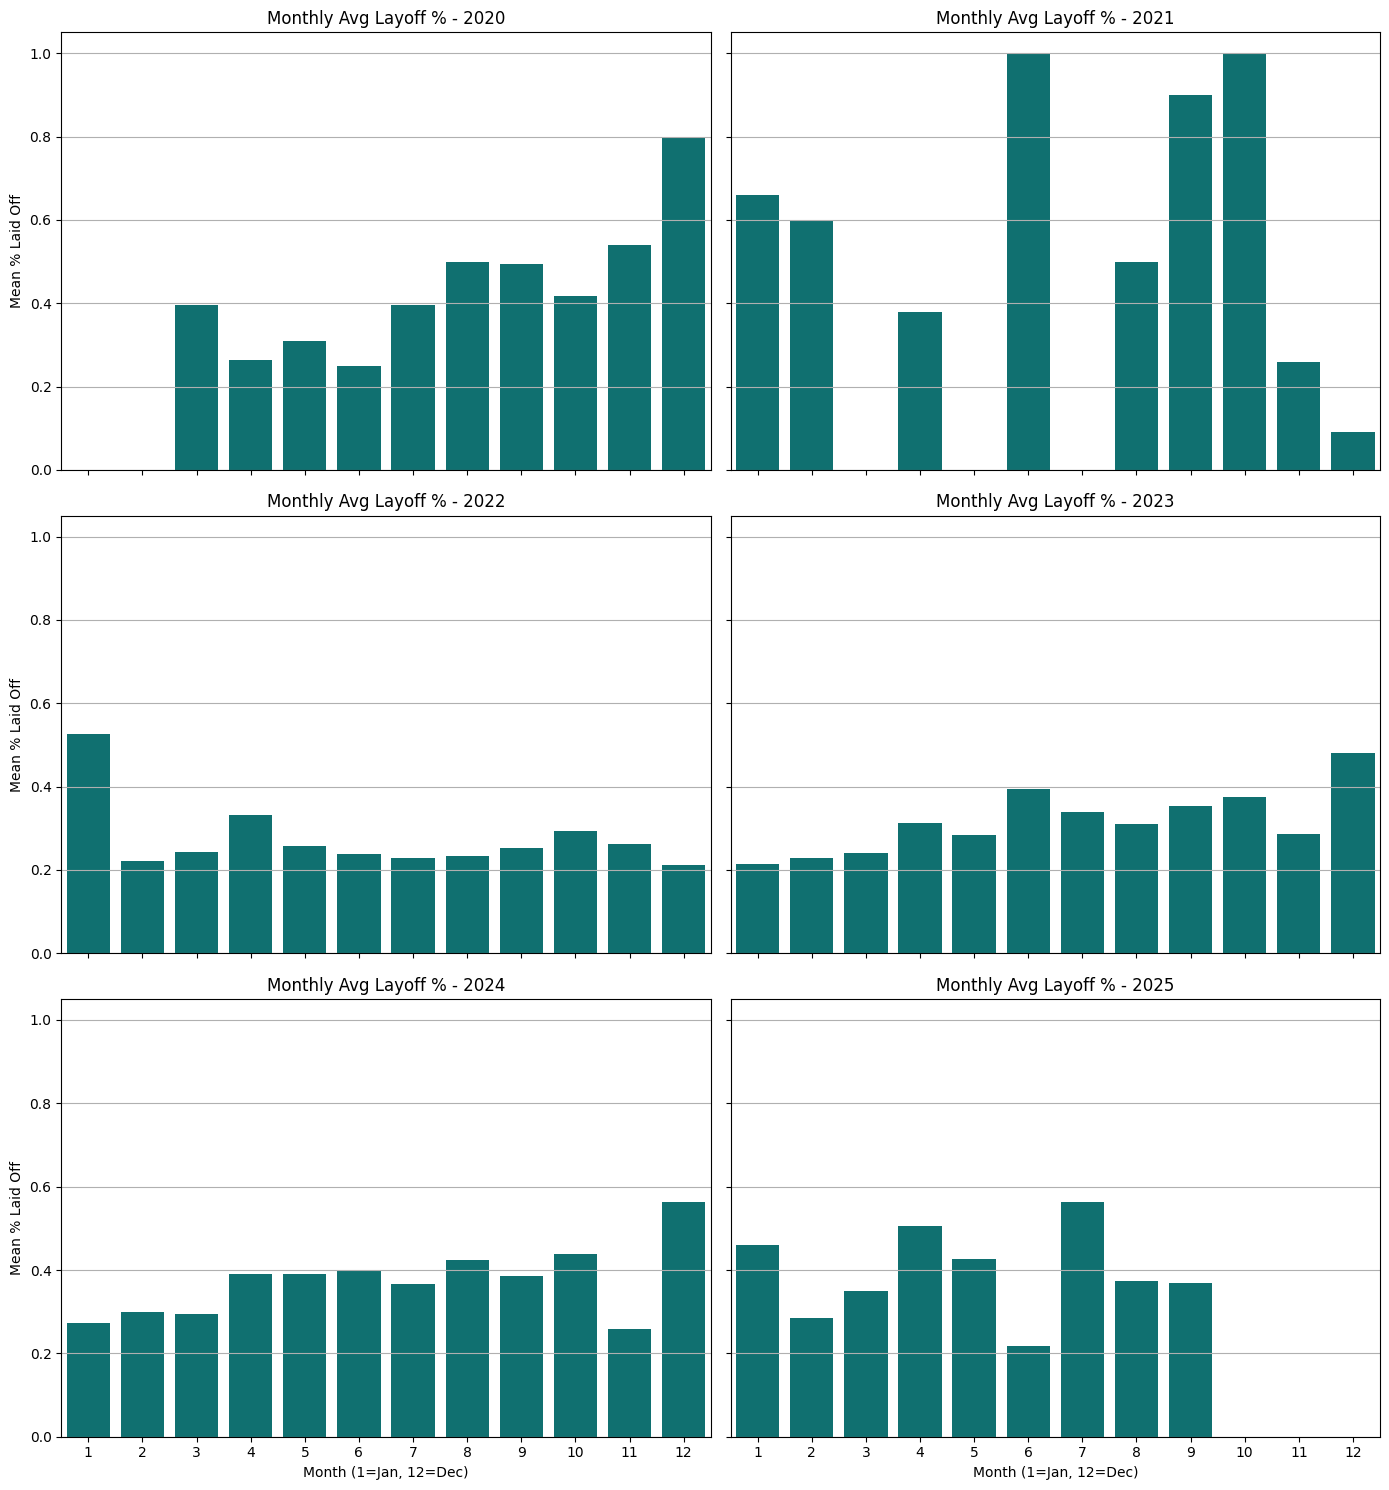

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import math


monthly_yearly = df.groupby(["year", "month"])["percentage_laid_off"].mean().reset_index()


years = sorted(monthly_yearly["year"].unique())


n_rows = math.ceil(len(years)/2)
fig, axes = plt.subplots(n_rows, 2, figsize=(14, 5*n_rows), sharex=True, sharey=True)

axes = axes.flatten()  

for i, year in enumerate(years):
    data = monthly_yearly[monthly_yearly["year"] == year]
    sns.barplot(
        x="month", 
        y="percentage_laid_off", 
        data=data, 
        order=list(range(1,13)),  
        ax=axes[i], 
        color="teal"
    )
    axes[i].set_title(f"Monthly Avg Layoff % - {year}")
    axes[i].set_xlabel("Month (1=Jan, 12=Dec)")
    axes[i].set_ylabel("Mean % Laid Off")
    axes[i].grid(True, axis="y")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2720 entries, 1 to 7801
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company              2720 non-null   object        
 1   location             2719 non-null   object        
 2   date                 2720 non-null   datetime64[ns]
 3   percentage_laid_off  2720 non-null   float64       
 4   industry             2718 non-null   object        
 5   source               2720 non-null   object        
 6   stage                2716 non-null   object        
 7   funds_raised         2434 non-null   float64       
 8   country              2719 non-null   object        
 9   year                 2720 non-null   int32         
 10  month                2720 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(2), object(6)
memory usage: 233.8+ KB


/var/folders/8t/gkh6xnhd3lnfwhhb_pxll2bc0000gn/T/ipykernel_50113/18247248.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


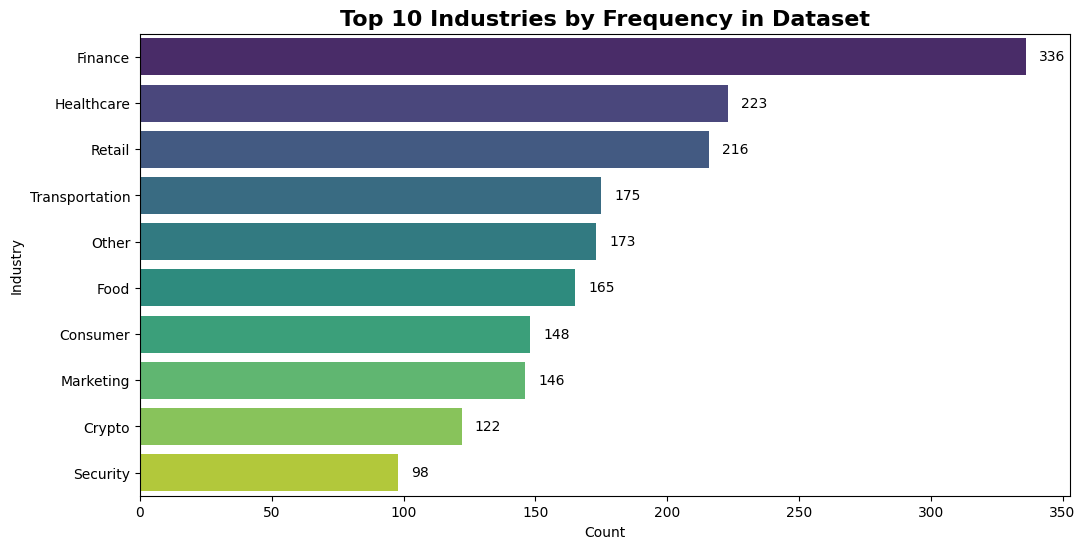

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))

# Get top 10 industries
top_industries = df["industry"].value_counts().head(10)

# Barplot
sns.barplot(
    x=top_industries.values,
    y=top_industries.index,
    palette="viridis"  # better colors
)

# Titles and labels
plt.title("Top 10 Industries by Frequency in Dataset", fontsize=16, weight="bold")
plt.xlabel("Count")
plt.ylabel("Industry")

# Add value labels
for index, value in enumerate(top_industries.values):
    plt.text(value + 5, index, str(value), va="center", fontsize=10)

plt.show()


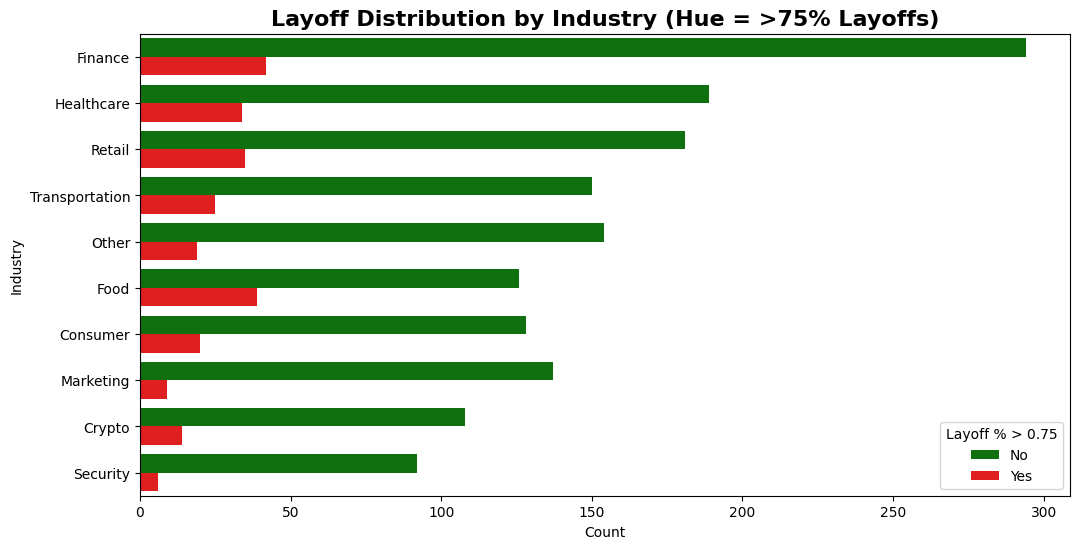

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column for condition
df["high_layoff"] = df["percentage_laid_off"] > 0.75

plt.figure(figsize=(12,6))
sns.countplot(
    data=df,
    y="industry", 
    hue="high_layoff",
    order=df["industry"].value_counts().index[:10],  # top 10 industries
    palette={True: "red", False: "green"}
)

plt.title("Layoff Distribution by Industry (Hue = >75% Layoffs)", fontsize=16, weight="bold")
plt.xlabel("Count")
plt.ylabel("Industry")
plt.legend(title="Layoff % > 0.75", labels=["No", "Yes"])
plt.show()


In [51]:
indus_mean=df.groupby("industry")["percentage_laid_off"].mean().sort_values(ascending=False).head(10)

/var/folders/8t/gkh6xnhd3lnfwhhb_pxll2bc0000gn/T/ipykernel_50113/2480487957.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


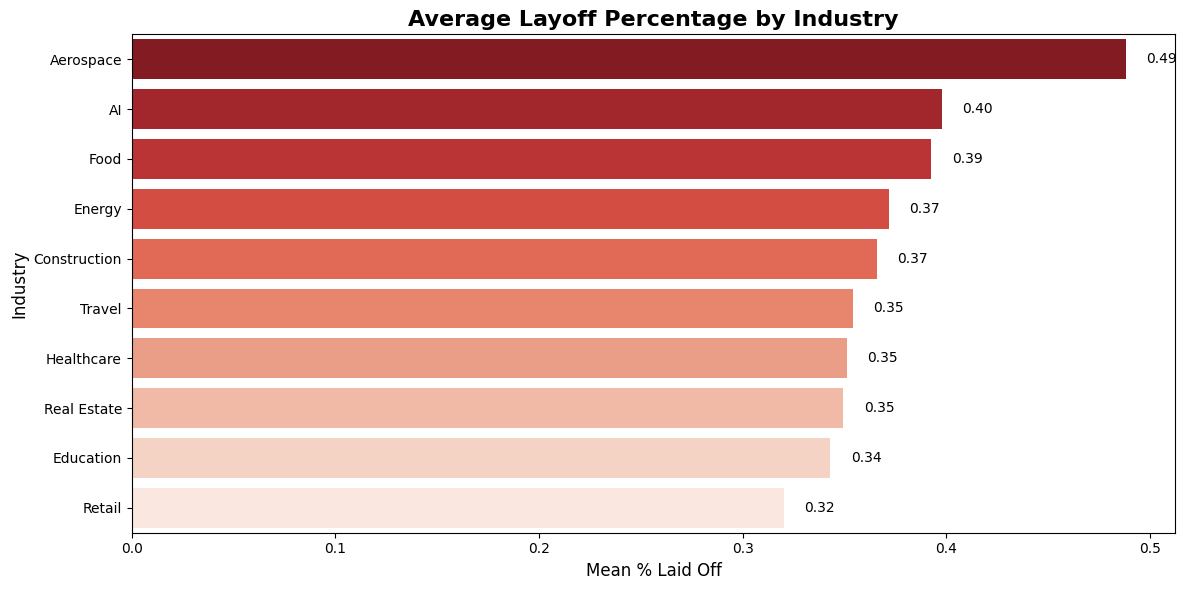

In [52]:
plt.figure(figsize=(12,6))


sns.barplot(
    x=indus_mean.values,
    y=indus_mean.index,
    palette="Reds_r" 
)

plt.title("Average Layoff Percentage by Industry", fontsize=16, weight="bold")
plt.xlabel("Mean % Laid Off", fontsize=12)
plt.ylabel("Industry", fontsize=12)

for index, value in enumerate(indus_mean.values):
    plt.text(value + 0.01, index, f"{value:.2f}", va="center", fontsize=10)

plt.tight_layout()
plt.show()


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2720 entries, 1 to 7801
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company              2720 non-null   object        
 1   location             2719 non-null   object        
 2   date                 2720 non-null   datetime64[ns]
 3   percentage_laid_off  2720 non-null   float64       
 4   industry             2718 non-null   object        
 5   source               2720 non-null   object        
 6   stage                2716 non-null   object        
 7   funds_raised         2434 non-null   float64       
 8   country              2719 non-null   object        
 9   year                 2720 non-null   int32         
 10  month                2720 non-null   int32         
 11  high_layoff          2720 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(2), int32(2), object(6)
memory usage: 236.4+ KB


In [54]:
df[df["industry"]=="Seed"]

,company,location,date,percentage_laid_off,industry,source,stage,funds_raised,country,year,month,high_layoff


<Axes: xlabel='stage', ylabel='percentage_laid_off'>

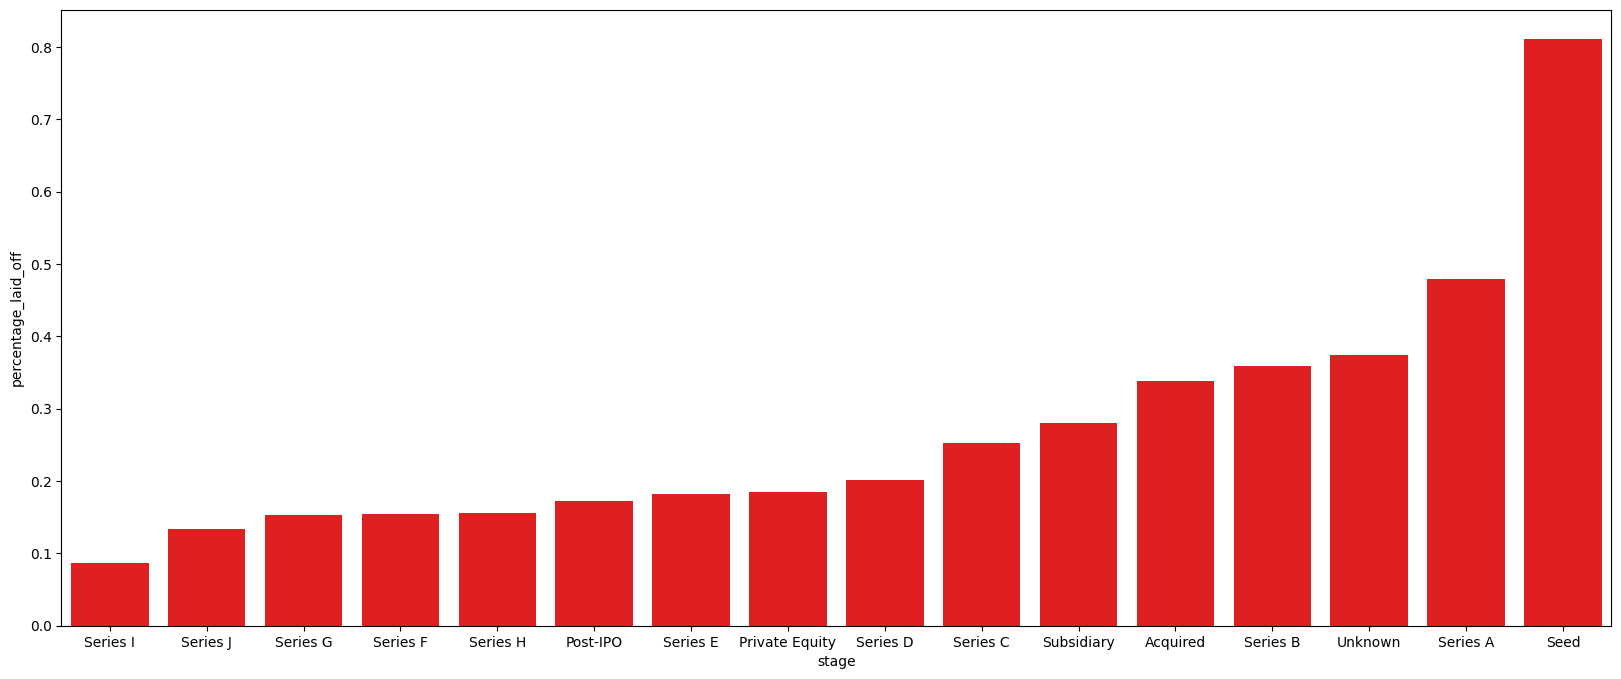

In [55]:
plt.figure(figsize=(20,8))
sns.barplot(df.groupby("stage")["percentage_laid_off"].mean().sort_values().tail(20),color="red")

Employees in the seed stage have the most chances of being layed off 


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2720 entries, 1 to 7801
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company              2720 non-null   object        
 1   location             2719 non-null   object        
 2   date                 2720 non-null   datetime64[ns]
 3   percentage_laid_off  2720 non-null   float64       
 4   industry             2718 non-null   object        
 5   source               2720 non-null   object        
 6   stage                2716 non-null   object        
 7   funds_raised         2434 non-null   float64       
 8   country              2719 non-null   object        
 9   year                 2720 non-null   int32         
 10  month                2720 non-null   int32         
 11  high_layoff          2720 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(2), int32(2), object(6)
memory usage: 236.4+ KB


In [57]:
coun=df.groupby("country")["percentage_laid_off"].mean().sort_values(ascending=False).head(10)

<Axes: xlabel='country'>

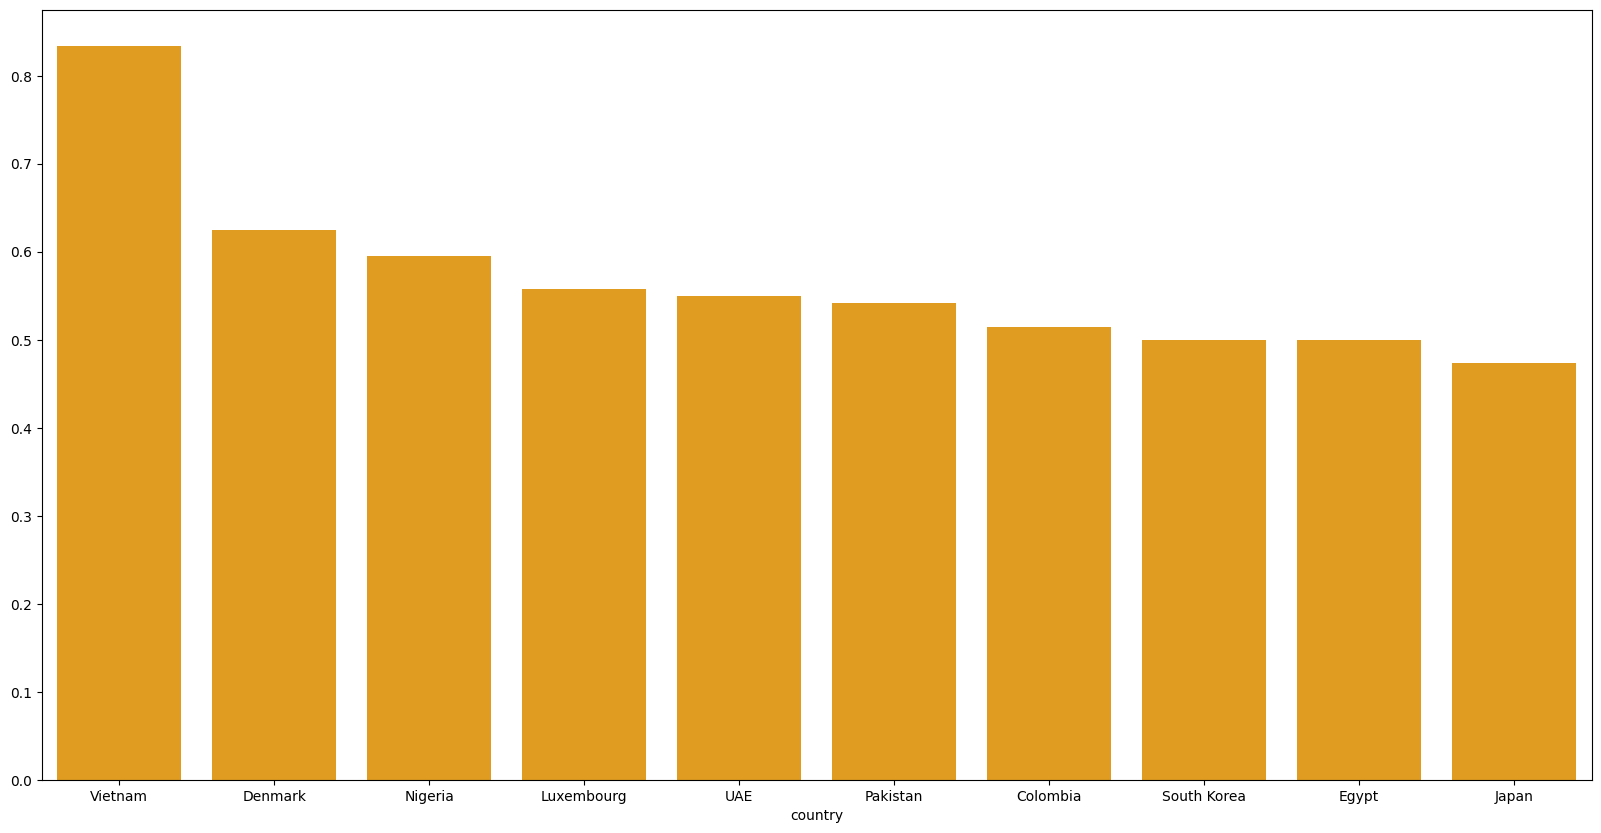

In [58]:
plt.figure(figsize=(20,10))
sns.barplot(x=coun.index, y=coun.values,color="orange")
